## Understanding SHAP values

Trying to understand the details of algorithm1 in the Lundberg nature paper:
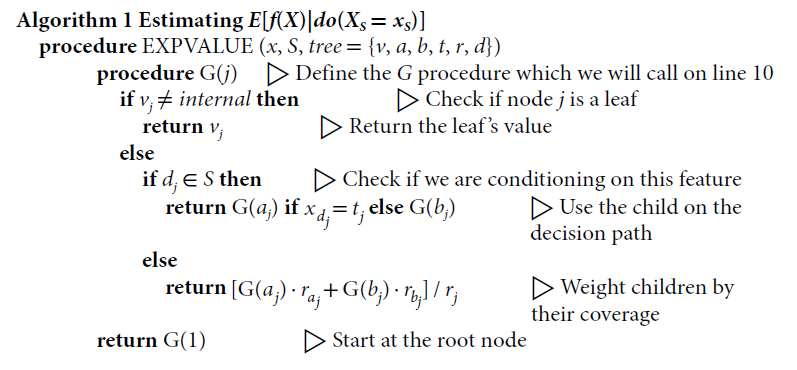

In [1]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.inspection import plot_partial_dependence

import copy
import numpy as np

#for plotting
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import _tree #for _tree.TREE_UNDEFINED
import graphviz
import shap


### Two feature AND example

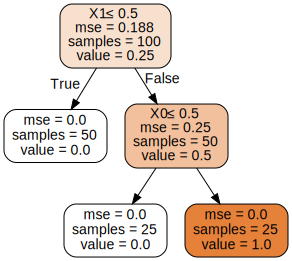

In [2]:
#https://shap.readthedocs.io/en/latest/example_notebooks/tree_explainer/Understanding%20Tree%20SHAP%20for%20Simple%20Models.html
# build data
N = 100
M = 4
X = np.zeros((N,M))
X.shape
y = np.zeros(N)
X[:1 * N//4, 1] = 1
X[:N//2, 0] = 1
X[N//2:3 * N//4, 1] = 1
y[:1 * N//4] = 1

# fit model
and_model = DecisionTreeRegressor(max_depth=2)
and_model.fit(X, y)

# draw model
dot_data = tree.export_graphviz(and_model, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### [Explain the model](https://shap.readthedocs.io/en/latest/example_notebooks/tree_explainer/Understanding%20Tree%20SHAP%20for%20Simple%20Models.html)

Note that the bias term is the expected output of the model over the training dataset (0.25). The SHAP value for features not used in the model is always 0, while for x0
and x1 it is just the difference between the expected value and the output of the model split equally between them (since they equally contribute to the AND function).

In [3]:
xs = [np.ones(M), np.zeros(M)]
for x in xs:
    print()
    print("          x =", x)
    print("shap_values =", shap.TreeExplainer(and_model).shap_values(x))


          x = [1. 1. 1. 1.]


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


shap_values = [0.375 0.375 0.    0.   ]

          x = [0. 0. 0. 0.]


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


shap_values = [-0.125 -0.125  0.     0.   ]


Trying to reproduce these values:

Following Algorithm 1 I compute the conditional expectations:
(I am enumerating the nodes from 1 to 5 going down and left)

For $x_0$:
$$
\hat{f}_x(x_0)= \frac{50}{100} G(j=2) + \frac{50}{100} G(j=3) = \frac{50}{100}\cdot 0 + \frac{50}{100}\cdot
\begin{cases}
0, \text{ for } x_0== 0\\
1, \text{ for } x_0== 1
\end{cases}
$$
For $x_1$:
$$
\hat{f}_x(x_1)= 
\begin{cases}
G(2) = 0 , \text{ for } x_1 == 0\\
G(3) = \frac{25}{50}\cdot 0 + \frac{25}{50}\cdot 1 , \text{ for } x_1 == 1
\end{cases}
$$

So, all in all:

$$
\hat{f}_x(x_0)= 
\begin{cases}
0, \; \; \text{   for } x_0== 0\\
0.5, \text{ for } x_0== 1
\end{cases}
$$
$$
\hat{f}_x(x_1)= 
\begin{cases}
0, \; \; \text{   for } x_1== 0\\
0.5, \text{ for } x_1== 1
\end{cases}
$$

So, the the difference between the expected value $E(f(x))=0.25$ and the output of the model is simply:

$$
E(f(x)) - \hat{f}_x(x_0)= 
\begin{cases}
0.25, \; \; \text{   for } x_0== 0\\
-0.25, \text{ for } x_0== 1
\end{cases}
$$
$$
E(f(x)) - \hat{f}_x(x_1)= 
\begin{cases}
0.25, \; \; \text{   for } x_1== 0\\
-0.25, \text{ for } x_1== 1
\end{cases}
$$

So, do we have to use the weighting twice ? 


### Partial dependence plots

How close is the relationship between SHAP values and pdps ?

the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.


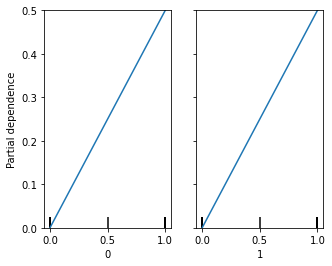

In [4]:
X10 = X[10,:]#shap.utils.sample(X, 10)
#shap.plots.partial_dependence("X0", and_model.predict, X10, ice=False, model_expected_value=True, feature_expected_value=True)
plt.rcParams["figure.figsize"]=5,4
features = [0,1]
tmp=plot_partial_dependence(and_model, X, features) 